## **Solution of Practice Exercise 03:**

### Examining a Possible Log-Linear Relationship Using Python

 In this exercise, Logarithm function will be used to transform a variable in order to see if the transformed variable gives the best fit:


### Import Necessary Modules:

In [2]:
!pip install pandas
!pip install sklearn
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

#import modules:
#importing modules
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

### Loading Data:

In [3]:
Housing_data = pd.read_csv\
('https://raw.githubusercontent.com/fenago/DSBook/main/Chapter%202/Housing.csv')

# Write code to display first five entries:
Housing_data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Check for null values in data set:

In [4]:
raw_data = Housing_data.dropna()

In [ ]:
#List the column names of the DataFrame
list(raw_data.columns)


['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

### Inspect the data types of the columns:

In [5]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 59.6+ KB


### Divide the DataFrame into training and test sets( Price : Dependent Variable)

In [6]:
X = raw_data.drop('price', axis = 1)
y = raw_data[['price']]
seed = 10
test_data_size = 0.3
X_train, X_test, \
y_train, y_test = train_test_split(X, y, \
test_size = test_data_size, \
random_state = seed)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

### Use the seaborn "**regplot**" function to create the scatter plot. Keep Confidence Interval: 95%. Set X and Y labels, the fontsize and name labels, the x and y limits, and the tick parameters of the matplotlib graph object(ax) in this same cell:

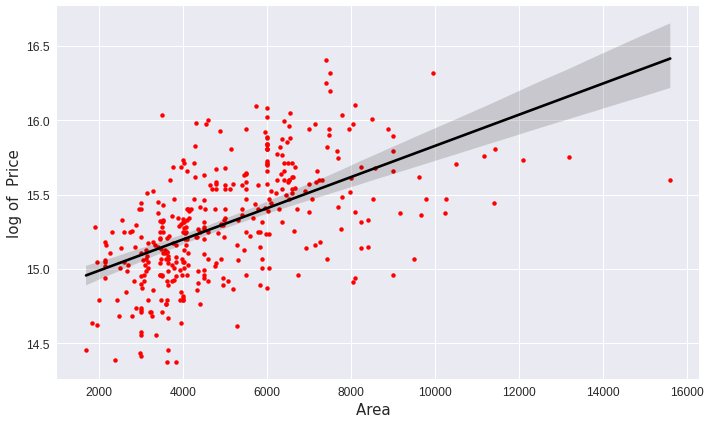

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
y = np.log(train_data['price'])
sns.regplot(x='area', y=y, ci=95, \
            data=train_data, ax=ax, color='k', \
            scatter_kws={"s": 20,"color": "red", \
            "alpha":1})
ax.set_ylabel('log of  Price', \
              fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel("Area "\
              " ", fontsize=15, \
              fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()